In [1]:
import tensorflow as tf
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
y_test.shape

(10000,)

In [7]:
# Melakukan nromalisasi pixel
X_train = X_train / 255.0
X_test = X_test / 255.0

In [8]:
# Menubah array menjadi satu dimensi
X_train = X_train.reshape(-1, 28 * 28)
X_test = X_test.reshape(-1, 28 * 28)


In [9]:
# one hot encoding untuk label
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# model ANN
model = Sequential()

# Input layer dan Hidden layer 1
model.add(Dense(128, activation='relu', input_shape=(784,)))

# Hidden layer 2
model.add(Dense(64, activation='relu'))

# Output layer
model.add(Dense(10, activation='softmax'))

# Kompilasi model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [11]:
# Latih model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 0.2398 - accuracy: 0.9285 - val_loss: 0.1401 - val_accuracy: 0.9579
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1019 - accuracy: 0.9687 - val_loss: 0.1062 - val_accuracy: 0.9684
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0715 - accuracy: 0.9772 - val_loss: 0.0956 - val_accuracy: 0.9700
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0533 - accuracy: 0.9826 - val_loss: 0.0790 - val_accuracy: 0.9766
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0422 - accuracy: 0.9864 - val_loss: 0.0936 - val_accuracy: 0.9719
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0353 - accuracy: 0.9887 - val_loss: 0.0835 - val_accuracy: 0.9765
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0302 - accuracy: 0.9901 - val_loss: 0.0792 - val_accuracy:

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [13]:
# Menghitung akurasi
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {test_accuracy:.4f}')

Test Accuracy: 0.9785


313/313 [==============================] - 0s 830us/step


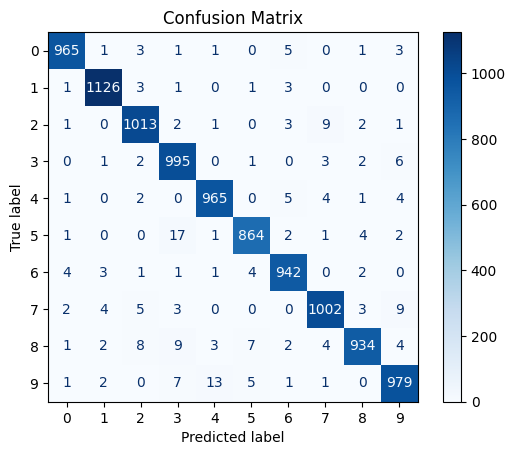

In [14]:
# Menghasilkan prediksi
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Kelas dengan probabilitas tertinggi
y_true = np.argmax(y_test, axis=1)  # Kelas sebenarnya

# Hitung dan tampilkan confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Tampilkan confusion matrix
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
cmd.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

### Penjelasan

- ##### Preprocessing
    - **Normalisasi**
    
        Skala piksel gambar berada di antara 0 dan 255, sehingga perlu dilakukan normalisasi data agar berada dalam rentang 0 hingga 1.
    
    - **Reshape**
    
        Gambar pada MNIST memiliki ukuran 28x28 piksel. Perlu mereshape gambar ke bentuk vektor satu dimensi (flattening).
    
    - **One-Hot Encoding untuk Label**

        Label kelas perlu diubah menjadi one-hot encoding karena kita melakukan klasifikasi multi-kelas.

- ##### Pemilihan Fitur

    Pada dataset MNIST, setiap gambar digit 28x28 piksel memiliki 784 fitur (28 * 28). Tidak ada fitur yang perlu dihapus secara langsung, karena setiap piksel gambar penting untuk menentukan kelas digit.

- ##### Arsitektur ANN

    - **Input Layer**: 784 neuron (untuk setiap piksel dalam gambar 28x28 yang telah di-flatten).
    - **Hidden Layer 1**: 128 neuron, dengan fungsi aktivasi ReLU.
    - **Hidden Layer 2**: 64 neuron, dengan fungsi aktivasi ReLU.
    - **Output Layer**: 10 neuron (untuk 10 kelas digit 0-9), dengan fungsi aktivasi softmax untuk klasifikasi multi-kelas.

- ##### Fungsi Aktivasi

    - **ReLU (Rectified Linear Unit)**: Fungsi ini mengubah nilai negatif menjadi nol, sementara nilai positif tetap. ReLU sering digunakan pada lapisan tersembunyi karena mengurangi masalah vanishing gradient.
    
    - **Softmax**: Digunakan pada lapisan output untuk masalah klasifikasi multi-kelas. Softmax mengonversi output menjadi probabilitas yang semuanya berjumlah 1.

- ##### Training Model

    Model dilatih dengan menggunakan perintah berikut:
    
    ```python
    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
    ```

    - **epochs=100**: Model dilatih selama 100 kali iterasi penuh pada dataset pelatihan.
    - **batch_size=32**: Setiap batch berisi 32 contoh data untuk memperbarui bobot model.
    - **validation_data**: Data validasi digunakan untuk mengevaluasi kinerja model selama pelatihan.

- ##### Hasil

    Hasil pada test menunjukkan akurasi sebesar **0.9791**.
